In [1]:
# Dependencies
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month = 6

results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==month).all()

In [5]:
#  3. Convert the June temperatures to a list.
temp_06 = list(np.ravel(results))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temp_df = pd.DataFrame(temp_06, columns=['June Temps'])
June_temp_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


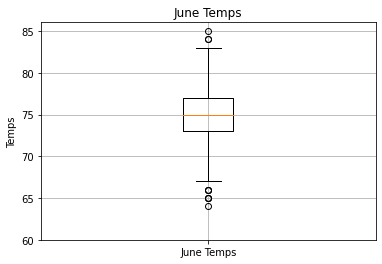

In [8]:
# Box-and-Whisker Plots
x_labels = ['June Temps']
fig, ax =plt.subplots()
ax.boxplot(June_temp_df, labels = x_labels)
ax.set_title('June Temps')
ax.set_ylabel('Temps')
ax.set_yticks(np.arange(60, 86, step=5.0))
ax.grid()
plt.show()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month = 12

results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==month).all()

In [10]:
# 7. Convert the December temperatures to a list.
temp_12 = list(np.ravel(results))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temp_df = pd.DataFrame(temp_12, columns=['Dec Temps'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temp_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


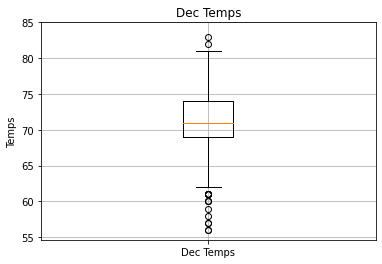

In [13]:
# Box-and-Whisker Plots
x_labels = ['Dec Temps']
fig, ax =plt.subplots()
ax.boxplot(Dec_temp_df, labels = x_labels)
ax.set_title('Dec Temps')
ax.set_ylabel('Temps')
ax.set_yticks(np.arange(55, 86, step=5.0))
ax.grid()
plt.show()

In [30]:
june_stats = June_temp_df.describe()
dec_stats = Dec_temp_df.describe()

combine_stats = june_stats.merge(dec_stats, left_index=True, right_index=True)
combine_stats

,June Temps,Dec Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


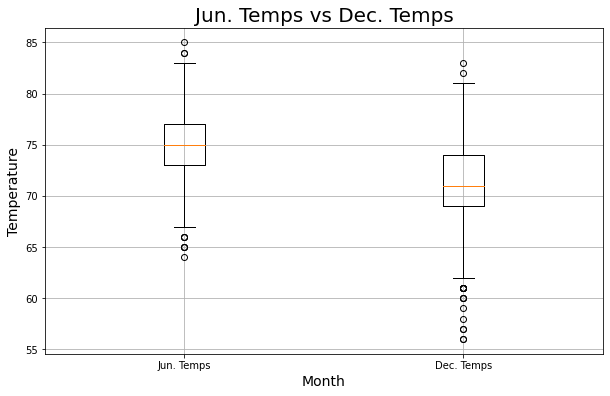

In [14]:
# conbine Box-and-Whisker Plots
x_labels = ['Jun. Temps', 'Dec. Temps']
fig, ax = plt.subplots(figsize=(10,6))
Temp_data = [temp_06, temp_12]
ax.boxplot(Temp_data,labels= x_labels)
ax.set_title('Jun. Temps vs Dec. Temps',fontsize=20)
ax.set_ylabel('Temperature',fontsize=14)
ax.set_xlabel('Month',fontsize=14)
ax.set_yticks(np.arange(55,86,step=5.0))
ax.grid()

plt.show()

In [22]:
# precipitation data for Jun
month = 6
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==month).filter(Measurement.prcp != 'None').all()
Jun_prcp_df = pd.DataFrame(prcp_06, columns=['Jun Prcp'])

Jun_prcp_df.describe()

,Jun Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [23]:
# precipitation data for Dec
month = 12
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==month).filter(Measurement.prcp != 'None').all()
Dec_prcp_df = pd.DataFrame(results, columns=['Dec Prcp'])

Dec_prcp_df.describe()

,Dec Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
